<a href="https://colab.research.google.com/github/AChierici84/companyReputation/blob/main/Reputazione_online_di_un_azienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Monitoraggio della reputazione online di un’azienda

MachineInnovators Inc. è leader nello sviluppo di applicazioni di machine learning scalabili e pronte per la produzione. Il focus principale del progetto è integrare metodologie MLOps per facilitare lo sviluppo, l'implementazione, il monitoraggio continuo e il retraining dei modelli di analisi del sentiment. L'obiettivo è abilitare l'azienda a migliorare e monitorare la reputazione sui social media attraverso l'analisi automatica dei sentiment.

Le aziende si trovano spesso a fronteggiare la sfida di gestire e migliorare la propria reputazione sui social media in modo efficace e tempestivo. Monitorare manualmente i sentiment degli utenti può essere inefficiente e soggetto a errori umani, mentre la necessità di rispondere rapidamente ai cambiamenti nel sentiment degli utenti è cruciale per mantenere un'immagine positiva dell'azienda.

**Benefici della Soluzione**

* **Automazione dell'Analisi del sentiment**: Implementando un modello di analisi del sentiment basato su FastText, MLOps Innovators Inc. automatizzerà l'elaborazione dei dati dai social media per identificare sentiment positivi, neutrali e negativi. Ciò permetterà una risposta rapida e mirata ai feedback degli utenti.
* **Monitoraggio Continuo della Reputazione**: Utilizzando metodologie MLOps, l'azienda implementerà un sistema di monitoraggio continuo per valutare l'andamento del sentiment degli utenti nel tempo. Questo consentirà di rilevare rapidamente cambiamenti nella percezione dell'azienda e di intervenire prontamente se necessario.
* **Retraining del Modello**: Introdurre un sistema di retraining automatico per il modello di analisi del sentiment assicurerà che l'algoritmo si adatti dinamicamente ai nuovi dati e alle variazioni nel linguaggio e nei comportamenti degli utenti sui social media. Mantenere alta l'accuratezza predittiva del modello è essenziale per una valutazione corretta del sentiment.

**Dettagli del Progetto**

1.  **Fase 1: Implementazione del Modello di Analisi del sentiment con FastText**
  * **Modello**: Utilizzare un modello pre-addestrato FastText per un’analisi del sentiment in grado di classificare testi dai social media in sentiment positivo, neutro o negativo. Servirsi di questo modello: [https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest](https://https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest)
  * **Dataset**: Utilizzare dataset pubblici contenenti testi e le rispettive etichette di sentiment.
2.  **Fase 2: Creazione della Pipeline CI/CD**
  * **Pipeline CI/CD**: Sviluppare una pipeline automatizzata per il training del modello, i test di integrazione e il deploy dell'applicazione su HuggingFace.
3.  **Fase 3: Deploy e Monitoraggio Continuo**
  * **Deploy su HuggingFace (facoltativo)**: Implementare il modello di analisi del sentiment, inclusi dati e applicazione, su HuggingFace per facilitare l'integrazione e la scalabilità.
  * **Sistema di Monitoraggio**: Configurare un sistema di monitoraggio per valutare continuamente le performance del modello e il sentiment rilevato.
4. **Consegna**
  * **Codice Sorgente**: Repository pubblica su GitHub con codice ben documentato per la pipeline CI/CD e l'implementazione del modello. La consegna vera e propria dovrà avvenire mediante un notebook google colab con al suo interno il link al repository GitHub.
  * **Documentazione**: Descrizione delle scelte progettuali, delle implementazioni e dei risultati ottenuti durante il progetto.

**Motivazione del Progetto**

L'implementazione di FastText per l'analisi del sentiment consente a MLOps Innovators Inc. di migliorare significativamente la gestione della reputazione sui social media. Automatizzando l'analisi del sentiment, l'azienda potrà rispondere più rapidamente alle esigenze degli utenti, migliorando la soddisfazione e rafforzando l'immagine dell'azienda sul mercato. Con questo progetto, MLOps Innovators Inc. promuove l'innovazione nel campo delle tecnologie AI, offrendo soluzioni avanzate e scalabili per le sfide moderne di gestione della reputazione aziendale.



In [42]:
from google.colab import userdata

HF_TOKEN = userdata.get('HF_TOKEN')
print("HF_TOKEN set successfully!")

HF_TOKEN set successfully!


##Modello

Twitter-roBERTa-base è un modello svilupatto per effettuare Sentiment Analysis. Il training iniziale è stata fatto con tweet dal 2018 al 2022, in inglese. Viene utilizzato come base di partenza per fare fine tuning su task similari come sentment analysis /classificazione. È un modello della famiglia RoBERTa (Robustly Optimized BERT Approach) una versione migliorata di BERT sviluppata da Facebook.

Le label utilizzate nel pre-training sono:
* 0 > Negative
* 1 > Neutral
* 2 > Positive

###Test di inferenza di base

In [2]:
from transformers import pipeline
model_path="cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("Covid cases are increasing fast!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'negative', 'score': 0.7235766649246216}]

## Dataset

Come dataset per il fine tuning verrà utilizzato SemEval Twitter Sentiment, una raccolta di Tweet annotati con etichette di sentiment, creato per le competizioni SemEval (Semantic Evaluation). Le etichette sono:

*   0 = negative
*   1 = neutral
*   2 = positive

equiparabili a quelle originali del modello. Questo semplifica l'elaborazione perchè non è necessario un mapping.

In [3]:
from datasets import load_dataset
dataset = load_dataset("tweet_eval", "sentiment")

README.md: 0.00B [00:00, ?B/s]

sentiment/train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

sentiment/test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

sentiment/validation-00000-of-00001.parq(…):   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Il dataset risulta diviso in train, test e validation.

In [4]:
dataset.column_names

{'train': ['text', 'label'],
 'test': ['text', 'label'],
 'validation': ['text', 'label']}

Ogni record è cotituito da testo e label associata.

In [5]:
dataset['train'][0]

{'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 'label': 2}

Verifichiamo le label del dataset.

In [6]:
dataset["train"].features

{'text': Value('string'),
 'label': ClassLabel(names=['negative', 'neutral', 'positive'])}

Valutiamo la distribuzione e il bilanciamento.

In [30]:
import numpy as np
import pandas as pd

count_train = len(dataset["train"])
count_test = len(dataset["test"])
count_validation = len(dataset["validation"])

total=count_train+count_test+count_validation

unique_train, counts_train = np.unique(dataset["train"]["label"], return_counts=True)
distribution_train = dict(zip(unique_train, counts_train))

unique_test, counts_test = np.unique(dataset["test"]["label"], return_counts=True)
distribution_test = dict(zip(unique_test, counts_test))

unique_validation, counts_validation = np.unique(dataset["validation"]["label"], return_counts=True)
distribution_validation = dict(zip(unique_validation, counts_validation))

# Crea un DataFrame dalle distribuzioni
df_distributions = pd.DataFrame({
    'Train': distribution_train,
    'Test': distribution_test,
    'Validation': distribution_validation
})

df_distributions = df_distributions.rename(index={0: 'Negative', 1: 'Neutral', 2: 'Positive'})

df_distributions['Total'] = df_distributions.sum(axis=1)
df_distributions.loc['Total'] = df_distributions.sum()

display(df_distributions)

,Train,Test,Validation,Total
Negative,7093,3972,312,11377
Neutral,20673,5937,869,27479
Positive,17849,2375,819,21043
Total,45615,12284,2000,59899


Le classi sono leggermente sbilanciate. La classe più numerosa è quella dei tweet neutri, a seguire i tweet positivi , infinie i tweet negativi. La distribuzione comunque è stata rispetta nella divisione tra train, test e validation

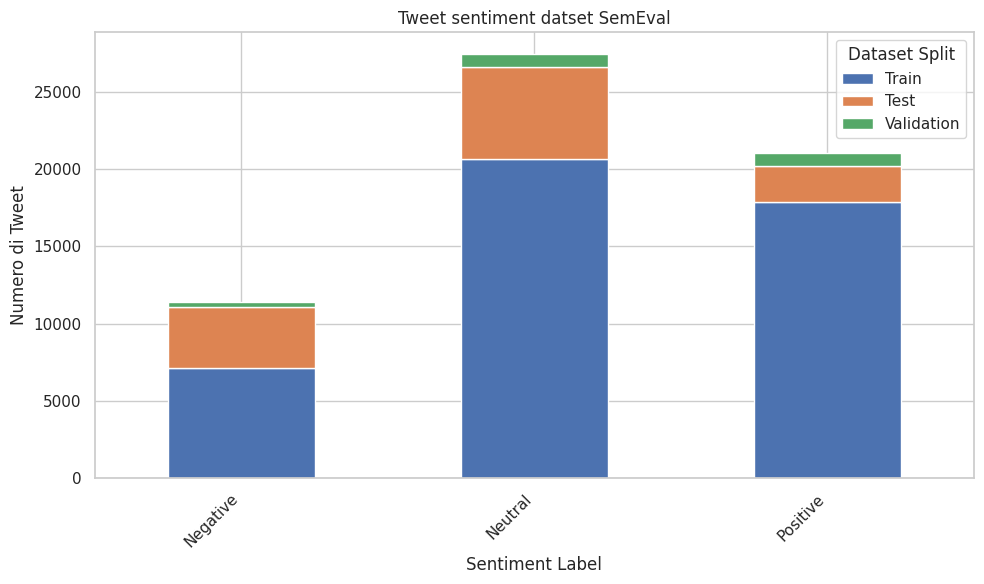

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Preparare i dati per il grafico (escludendo la riga e la colonna 'Total')
plot_data = df_distributions.iloc[:-1, :-1]

# Creare il grafico a barre impilate
ax = plot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Aggiungere titolo e etichette
plt.title('Tweet sentiment datset SemEval')
plt.xlabel('Sentiment Label')
plt.ylabel('Numero di Tweet')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset Split')
plt.tight_layout()
plt.show()


##Fine tuning

Carichiamo il modello pre-trained

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Definiamo la funzione di tokenizzazione

In [8]:
def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

Tokenizziamo il dataset.

In [9]:
tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/45615 [00:00<?, ? examples/s]

Map:   0%|          | 0/12284 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

Visualizziamo l'esito della tokenizzazione.

In [11]:
tokenized_dataset["train"][0]

{'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 'label': 2,
 'input_ids': [0,
  113,
  1864,
  565,
  787,
  12105,
  96,
  5,
  1461,
  2479,
  9,
  5,
  262,
  212,
  1040,
  6,
  8022,
  687,
  26110,
  179,
  5601,
  5,
  9846,
  9,
  42210,
  4,
  849,
  21136,
  44728,
  1208,
  31157,
  687,
  574,
  658,
  179,
  113,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

Prepariamo il modello per il training.

In [12]:
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
tokenized_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

Settiamo gli attributi del training.

In [15]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="sentiment-roberta-finetuned", #directory di output
    eval_strategy="epoch", # validaziane alla fine di ogni epoca
    save_strategy="epoch", # salvataggio del modello alla fine di ogni epoca
    learning_rate=2e-5,   #learning_rate
    per_device_train_batch_size=16,  #batch size training
    per_device_eval_batch_size=16, #batch size validazione
    num_train_epochs=3, # numero di epoche
    weight_decay=0.01, #regolarizzazione (riduce i pesi del modello ogni step)
    load_best_model_at_end=True, #carichiamo il modello migliore
    logging_steps=50,  # ogni quanti step salvare i log
    report_to=[]
)

Predisponaimo le metriche per la valutazione del modello.

In [18]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


In [19]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels, average="macro")["f1"]
    }

In [22]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    compute_metrics=compute_metrics
)

In [23]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.555000,0.548251,0.753500,0.741171
2,0.425300,0.601499,0.768500,0.751958
3,0.263600,0.722670,0.764500,0.753936


TrainOutput(global_step=8553, training_loss=0.4316622477225584, metrics={'train_runtime': 3008.572, 'train_samples_per_second': 45.485, 'train_steps_per_second': 2.843, 'total_flos': 9001438912247040.0, 'train_loss': 0.4316622477225584, 'epoch': 3.0})

Salviamo il modello ottenuto.

In [24]:
trainer.save_model("sentiment-roberta-finetuned")
tokenizer.save_pretrained("sentiment-roberta-finetuned")
#salvataggio dataset
dataset.save_to_disk("sentiment-roberta-finetuned")

Saving the dataset (0/1 shards):   0%|          | 0/45615 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/12284 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

##Valutazione sul test set

In [45]:
results = trainer.evaluate(eval_dataset=tokenized_dataset["test"])
print(results)

{'eval_loss': 0.6049224138259888, 'eval_accuracy': 0.7307880169325952, 'eval_f1': 0.7303927353156595, 'eval_runtime': 80.6559, 'eval_samples_per_second': 152.301, 'eval_steps_per_second': 9.522, 'epoch': 3.0}


###Matrice di confusione

In [56]:
predictions = trainer.predict(tokenized_dataset["test"])
logits = predictions.predictions
labels = predictions.label_ids
preds = np.argmax(logits, axis=-1)

<Figure size 1000x800 with 0 Axes>

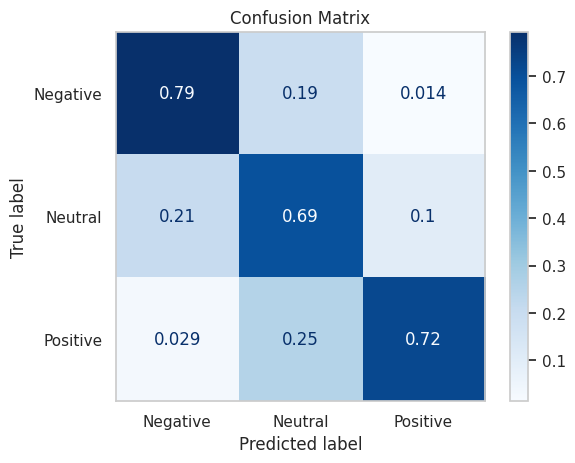

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(labels, preds, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

Esempi di testi mal classificati

In [55]:
label_names = dataset["test"].features["label"].names

misclassified_examples = []
for i in range(len(labels)):
    if labels[i] != preds[i]:
        misclassified_examples.append({
            "text": dataset["test"][i]["text"],
            "true_label": label_names[labels[i]],
            "predicted_label": label_names[preds[i]]
        })

print(f"Trovati {len(misclassified_examples)}/{len(labels)} ({(len(misclassified_examples)/len(labels)*100):.2f}%) esempi mal classificati.")
print("Mostriamo i primi 10:")
for i, example in enumerate(misclassified_examples[:10]):
    print(f"\n--- Esempio {i+1} ---")
    print(f"Testo: {example['text']}")
    print(f"Etichetta Vera: {example['true_label']}")
    print(f"Etichetta Predetta: {example['predicted_label']}")

Trovati 3307/12284 (26.92%) esempi mal classificati.
Mostriamo i primi 10:

--- Esempio 1 ---
Testo: @user @user what do these '1/2 naked pics' have to do with anything? They're not even like that.
Etichetta Vera: neutral
Etichetta Predetta: negative

--- Esempio 2 ---
Testo: Savchenko now Saakashvili took drug test live on Ukraine TV. To prove they are not drug-fueled loonies?
Etichetta Vera: neutral
Etichetta Predetta: negative

--- Esempio 3 ---
Testo: OPINION: The Anti-#Trump #Riots Are a #SmokeScreen:
Etichetta Vera: neutral
Etichetta Predetta: negative

--- Esempio 4 ---
Testo: ISIS and The CIA What You Need To Know! #ISIS #falseflag #saudi #CIA #mossad #israel
Etichetta Vera: neutral
Etichetta Predetta: negative

--- Esempio 5 ---
Testo: Listen to win passes to see #FantasticBeasts after 2pm w/ @user
Etichetta Vera: neutral
Etichetta Predetta: positive

--- Esempio 6 ---
Testo: Zac Efron Flaunts Fit Abs in New ‘Dirty Grandpa’... #ZacEfron
Etichetta Vera: neutral
Etichetta Predet

In alcuni casi espressioni come "it isn't too bad" traggono il sistema in inganno, in atri invece trovo la mood negativa sia accettabile in presenza di termini come "lost", "anything". A volte il tono del tweet nel complesso può essere neutro pur avendo alcuni termini negativi, non sempre è semplice per il modello raggiungere questo grado di ragionamento.

##Conclusioni

Il modello realizzato seppure non raggiunge prestazioni ottime si attesa su un discreto 73% e costituisce una buona base per l'inferenza. Sarà utile aggiungere tweet più mirati sull'azienda scelta.


Procediamo a salvare il modello  ottenuto su Hugging Face.

In [44]:
from huggingface_hub import login

login(token=HF_TOKEN)  #

repo_name = "sentiment-roberta-finetuned"  # il nome che vuoi dare al modello sul tuo account
username = "AChierici84"

# Salvare sul repo
model.push_to_hub(f"{username}/{repo_name}")
tokenizer.push_to_hub(f"{username}/{repo_name}")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...netuned/model.safetensors:   0%|          |  552kB /  499MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/AChierici84/sentiment-roberta-finetuned/commit/50a1c441a8cb0f8c89478c42f6b864320d054978', commit_message='Upload tokenizer', commit_description='', oid='50a1c441a8cb0f8c89478c42f6b864320d054978', pr_url=None, repo_url=RepoUrl('https://huggingface.co/AChierici84/sentiment-roberta-finetuned', endpoint='https://huggingface.co', repo_type='model', repo_id='AChierici84/sentiment-roberta-finetuned'), pr_revision=None, pr_num=None)

##Progetto completo

Repository github:

[https://github.com/AChierici84/companyReputation](https://github.com/AChierici84/companyReputation)